# Week3 숙제

1. 크리스마스 때 가장 핫했던 곳은 역은 어디 였을까?

In [ ]:
import pandas as pd

In [ ]:
sub = pd.read_csv('/content/서울교통공사 2021년 일별 역별 시간대별 승하차인원(1_8호선).csv', encoding = 'CP949')

In [ ]:
sub2 = sub[['날짜', '역명', '구분', '합 계']]

In [ ]:
sub2.columns = ['day', 'station', 'on_off', 'sum']

In [ ]:
sub3 = sub2.groupby(['day', 'station']).sum()

In [ ]:
sub3.loc['2021-12-25'].nlargest(1, 'sum')

sum
station         
잠실(송파구청)  166141

2. 위 자료를 근거로 야간 지하철 운행 구간을 시행하려 할 때 어떤 호선을 선택해야 할까?

In [ ]:
sub.columns

Index(['연번', '날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06시-07시', '07시-08시',
       '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시',
       '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시',
       '20시-21시', '21시-22시', '22시-23시', '23시 이후', '합 계'],
      dtype='object')

In [ ]:
sub[['호선', '23시 이후']].groupby('호선').sum()

23시 이후
호선          
1    1054846
2   10016003
3    3091067
4    3732692
5    4781107
6    3084835
7    5796502
8    1376062

3. 데이터를 고려했을 때 올해 사람들이 가장 많이 운집할 것으로 예상되는 시기와 역은?

In [ ]:
sub

연번          날짜  호선   역번호   역명  구분  06시 이전  06시-07시  07시-08시  \
0            1  2021-01-01   1   150  서울역  승차      86      111      157   
1            2  2021-01-01   1   150  서울역  하차      85      355      438   
2            3  2021-01-01   1   151   시청  승차      43       45       75   
3            4  2021-01-01   1   151   시청  하차      40      145      176   
4            5  2021-01-01   1   152   종각  승차      49       59       89   
...        ...         ...  ..   ...  ...  ..     ...      ...      ...   
204369  204370  2021-12-31   8  2826   수진  하차      25       75       96   
204370  204371  2021-12-31   8  2827   모란  승차      44      102      279   
204371  204372  2021-12-31   8  2827   모란  하차      20       96      120   
204372  204373  2021-12-31   8  2828  남위례  승차      20       83      279   
204373  204374  2021-12-31   8  2828  남위례  하차      10       41      119   

        08시-09시  ...  15시-16시  16시-17시  17시-18시  18시-19시  19시-20시  20시-21시  \
0           306  ...      837      796      839      658      579      479   
1           592  ...      781      710      626      437      425      354   
2           111  ...      227      233      347      294      186      216   
3           312  ...      158      140      152      121       57       54   
4           126  ...      513      548      504      572      492      593   
...         ...  ...      ...      ...      ...      ...      ...      ...   
204369      340  ...      358      389      407      439      317      223   
204370      391  ...      298      393      360      351      206      197   
204371      311  ...      300      290      286      347      176      107   
204372      347  ...      227      218      277      184       74       73   
204373      375  ...      213      341      322      382      263      145   

        21시-22시  22시-23시  23시 이후   합 계  
0           510      445     101  9339  
1           307      134      77  9951  
2           204      110      29  2947  
3            64       23      17  2700  
4           513      130      31  5686  
...         ...      ...     ...   ...  
204369      323      204     100  4605  
204370      209       90      24  4328  
204371      154       96      52  3402  
204372       95       54      18  3092  
204373      209      138      34  3438  

[204374 rows x 26 columns]

In [ ]:
sub.drop('합 계', axis = 1).max()

연번             204374
날짜         2021-12-31
호선                  8
역번호              2828
역명              효창공원앞
구분                 하차
06시 이전           1648
06시-07시          3158
07시-08시          9183
08시-09시         19237
09시-10시         14877
10시-11시          7340
11시-12시          4968
12시-13시          6998
13시-14시          7376
14시-15시          8118
15시-16시          7565
16시-17시          7744
17시-18시         10897
18시-19시         15536
19시-20시          9846
20시-21시          8162
21시-22시         11120
22시-23시         10141
23시 이후           3908
dtype: object

In [ ]:
sub.nlargest(1, '08시-09시')

연번          날짜  호선   역번호       역명  구분  06시 이전  06시-07시  07시-08시  \
103839  103840  2021-07-05   7  2748  가산디지털단지  하차     238     1106     6033   

        08시-09시  ...  15시-16시  16시-17시  17시-18시  18시-19시  19시-20시  20시-21시  \
103839    19237  ...      949      874      926     1210      927      462   

        21시-22시  22시-23시  23시 이후    합 계  
103839      381      375     176  49772  

[1 rows x 26 columns]

In [ ]:
sub.loc[sub['역명'] == '가산디지털단지'].head(10)

연번          날짜  호선   역번호       역명  구분  06시 이전  06시-07시  07시-08시  \
492    493  2021-01-01   7  2748  가산디지털단지  승차     119       93      122   
493    494  2021-01-01   7  2748  가산디지털단지  하차      48      111      155   
1050  1051  2021-01-02   7  2748  가산디지털단지  승차     129      144      171   
1051  1052  2021-01-02   7  2748  가산디지털단지  하차      75      214      222   
1604  1605  2021-01-03   7  2748  가산디지털단지  승차     102      103       89   
1605  1606  2021-01-03   7  2748  가산디지털단지  하차      43      121      145   
2158  2159  2021-01-04   7  2748  가산디지털단지  승차     265      331      742   
2159  2160  2021-01-04   7  2748  가산디지털단지  하차     211      929     5433   
2712  2713  2021-01-05   7  2748  가산디지털단지  승차     257      283      693   
2713  2714  2021-01-05   7  2748  가산디지털단지  하차     224      852     5007   

      08시-09시  ...  15시-16시  16시-17시  17시-18시  18시-19시  19시-20시  20시-21시  \
492       179  ...      498      563      587      543      465      483   
493       238  ...      510      435      413      282      164      133   
1050      282  ...      742      850      827      798      629      595   
1051      436  ...      737      549      463      386      231      214   
1604      174  ...      594      660      653      564      464      523   
1605      233  ...      614      448      414      347      241      246   
2158      797  ...     1279     1935     7420    13895     6302     3151   
2159    16988  ...      701      664      761      978      790      410   
2712      916  ...     1327     1954     7058    13513     6132     3213   
2713    16331  ...      755      737      795     1004      776      388   

      21시-22시  22시-23시  23시 이후    합 계  
492       503      125      54   5929  
493       178       90      60   5348  
1050      617      196      77   8399  
1051      238      115      62   7988  
1604      489      166      53   6371  
1605      229      113      70   6201  
2158     2242      680     186  43312  
2159      336      202      81  43442  
2712     2339      658     178  42823  
2713      351      192      73  42817  

[10 rows x 26 columns]

# 데이터 시각화

##1. 언제 쓸까?

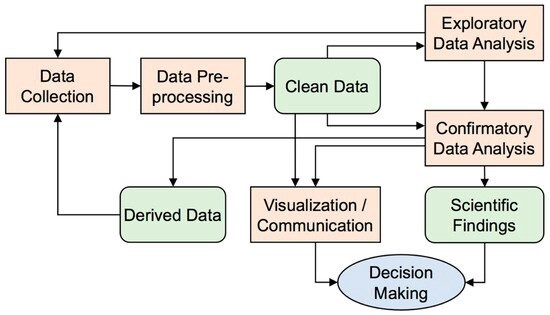

**일본맥주 불매운동의 영향 파악하기**

1. 마트, 슈퍼, 편의점, 백화점의 대략적인 경향성 확인
2. 그 중 가장 변동이 큰 마트로 분석 시작
3. 전처리 및 클렌징
4. 중간 결과 시각화를 통해 인사이트 도출
5. 가장 유의미한 변인 찾기 위해 모델링
6. 유의미한 결과 값 도출 및 인사이트 도출

## 2. 잘 된 시각화란 뭘까?

역사상 최고로 꼽히는 10가지 데이터 시각화의 예



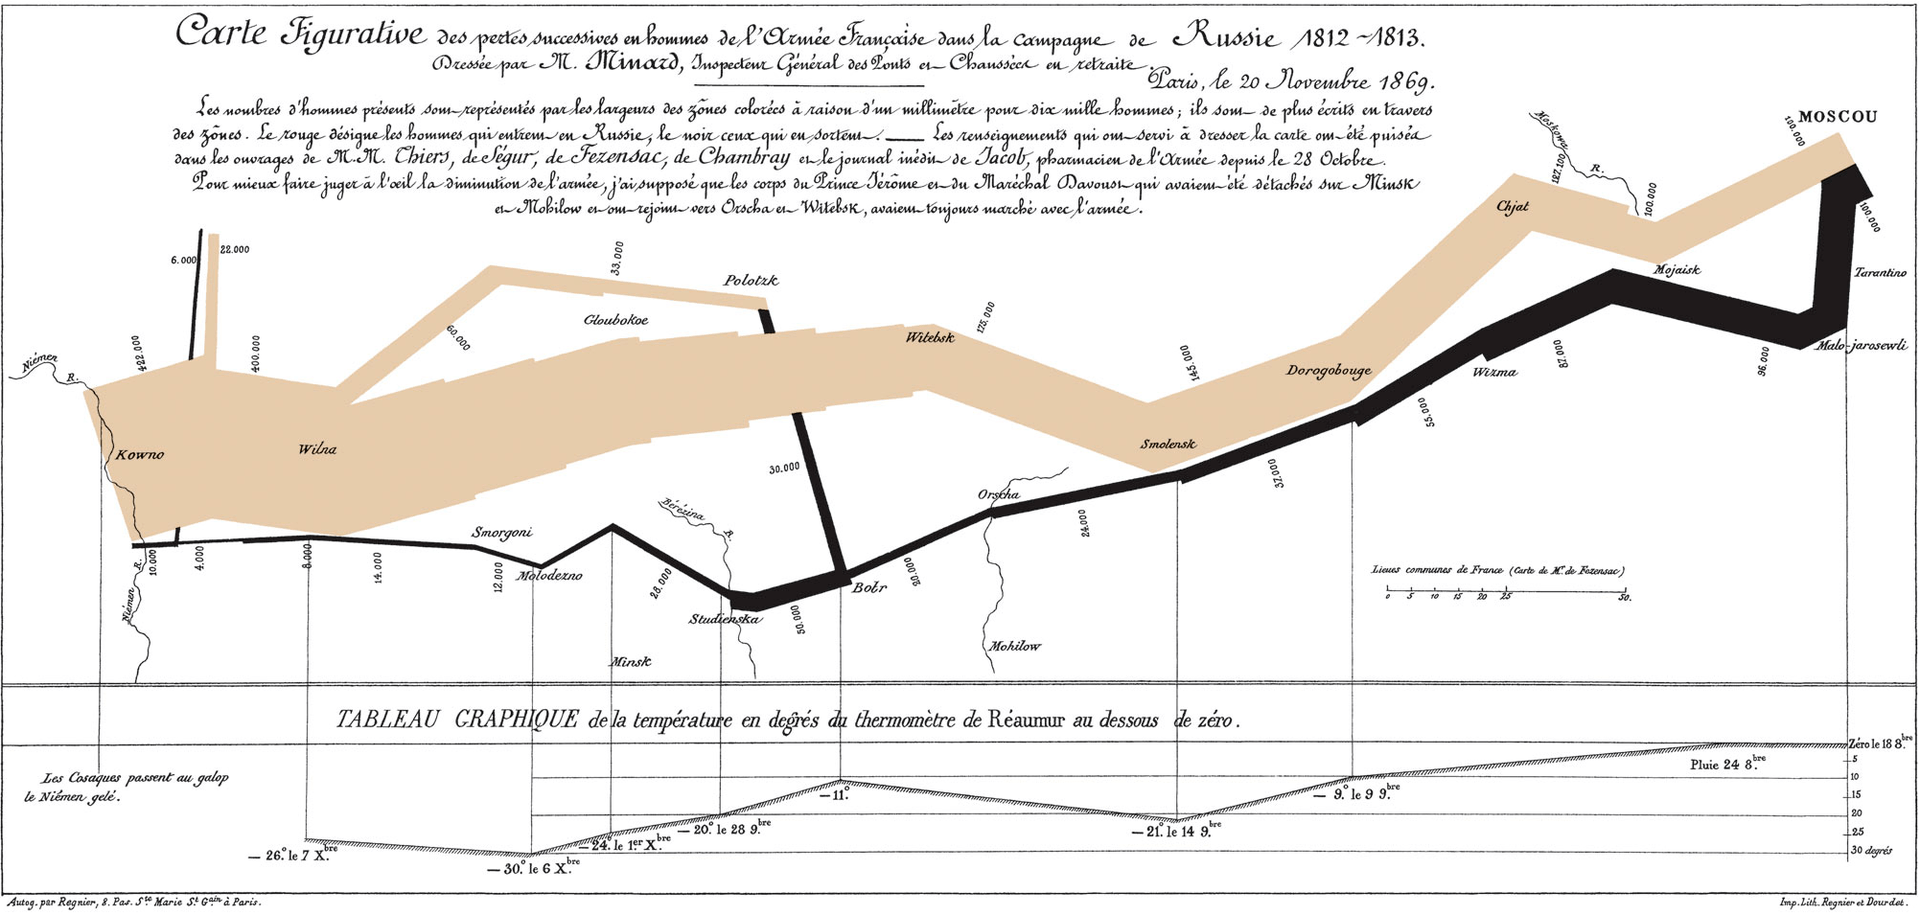

1812년 나폴레옹은 모스크바를 점령하기 위해 진군을 했으나, 그 결과는 재앙이었습니다. 47만의 병사를 이끌고 출발해서, 겨우 1만 명만이 돌아왔습니다. 그 캠페인의 스토리를 전해주는 이 차트는, 역사상 가장 유명한 비주얼리제이션의 하나가 되었습니다.

맵은 나폴레옹 군대의 출정과 복귀를 세부적으로 보여줍니다. 선의 너비가 군인의 총 수를 나타내고 색상은 방향(노란색: 모스크바로의 출정, 검은색: 복귀)을 나타냅니다. 비주얼리제이션의 중앙 아래에는 또한 간단한 온도 라인 그래프가 있어 급속히 떨어지는 추운 겨울의 기온을 보여줍니다. 이 비주얼리제이션은 효율적이고, 자세하며, 그 여정이 얼마나 끔찍한 참사였는지를 충격적인 그림으로 그려내고 있습니다.

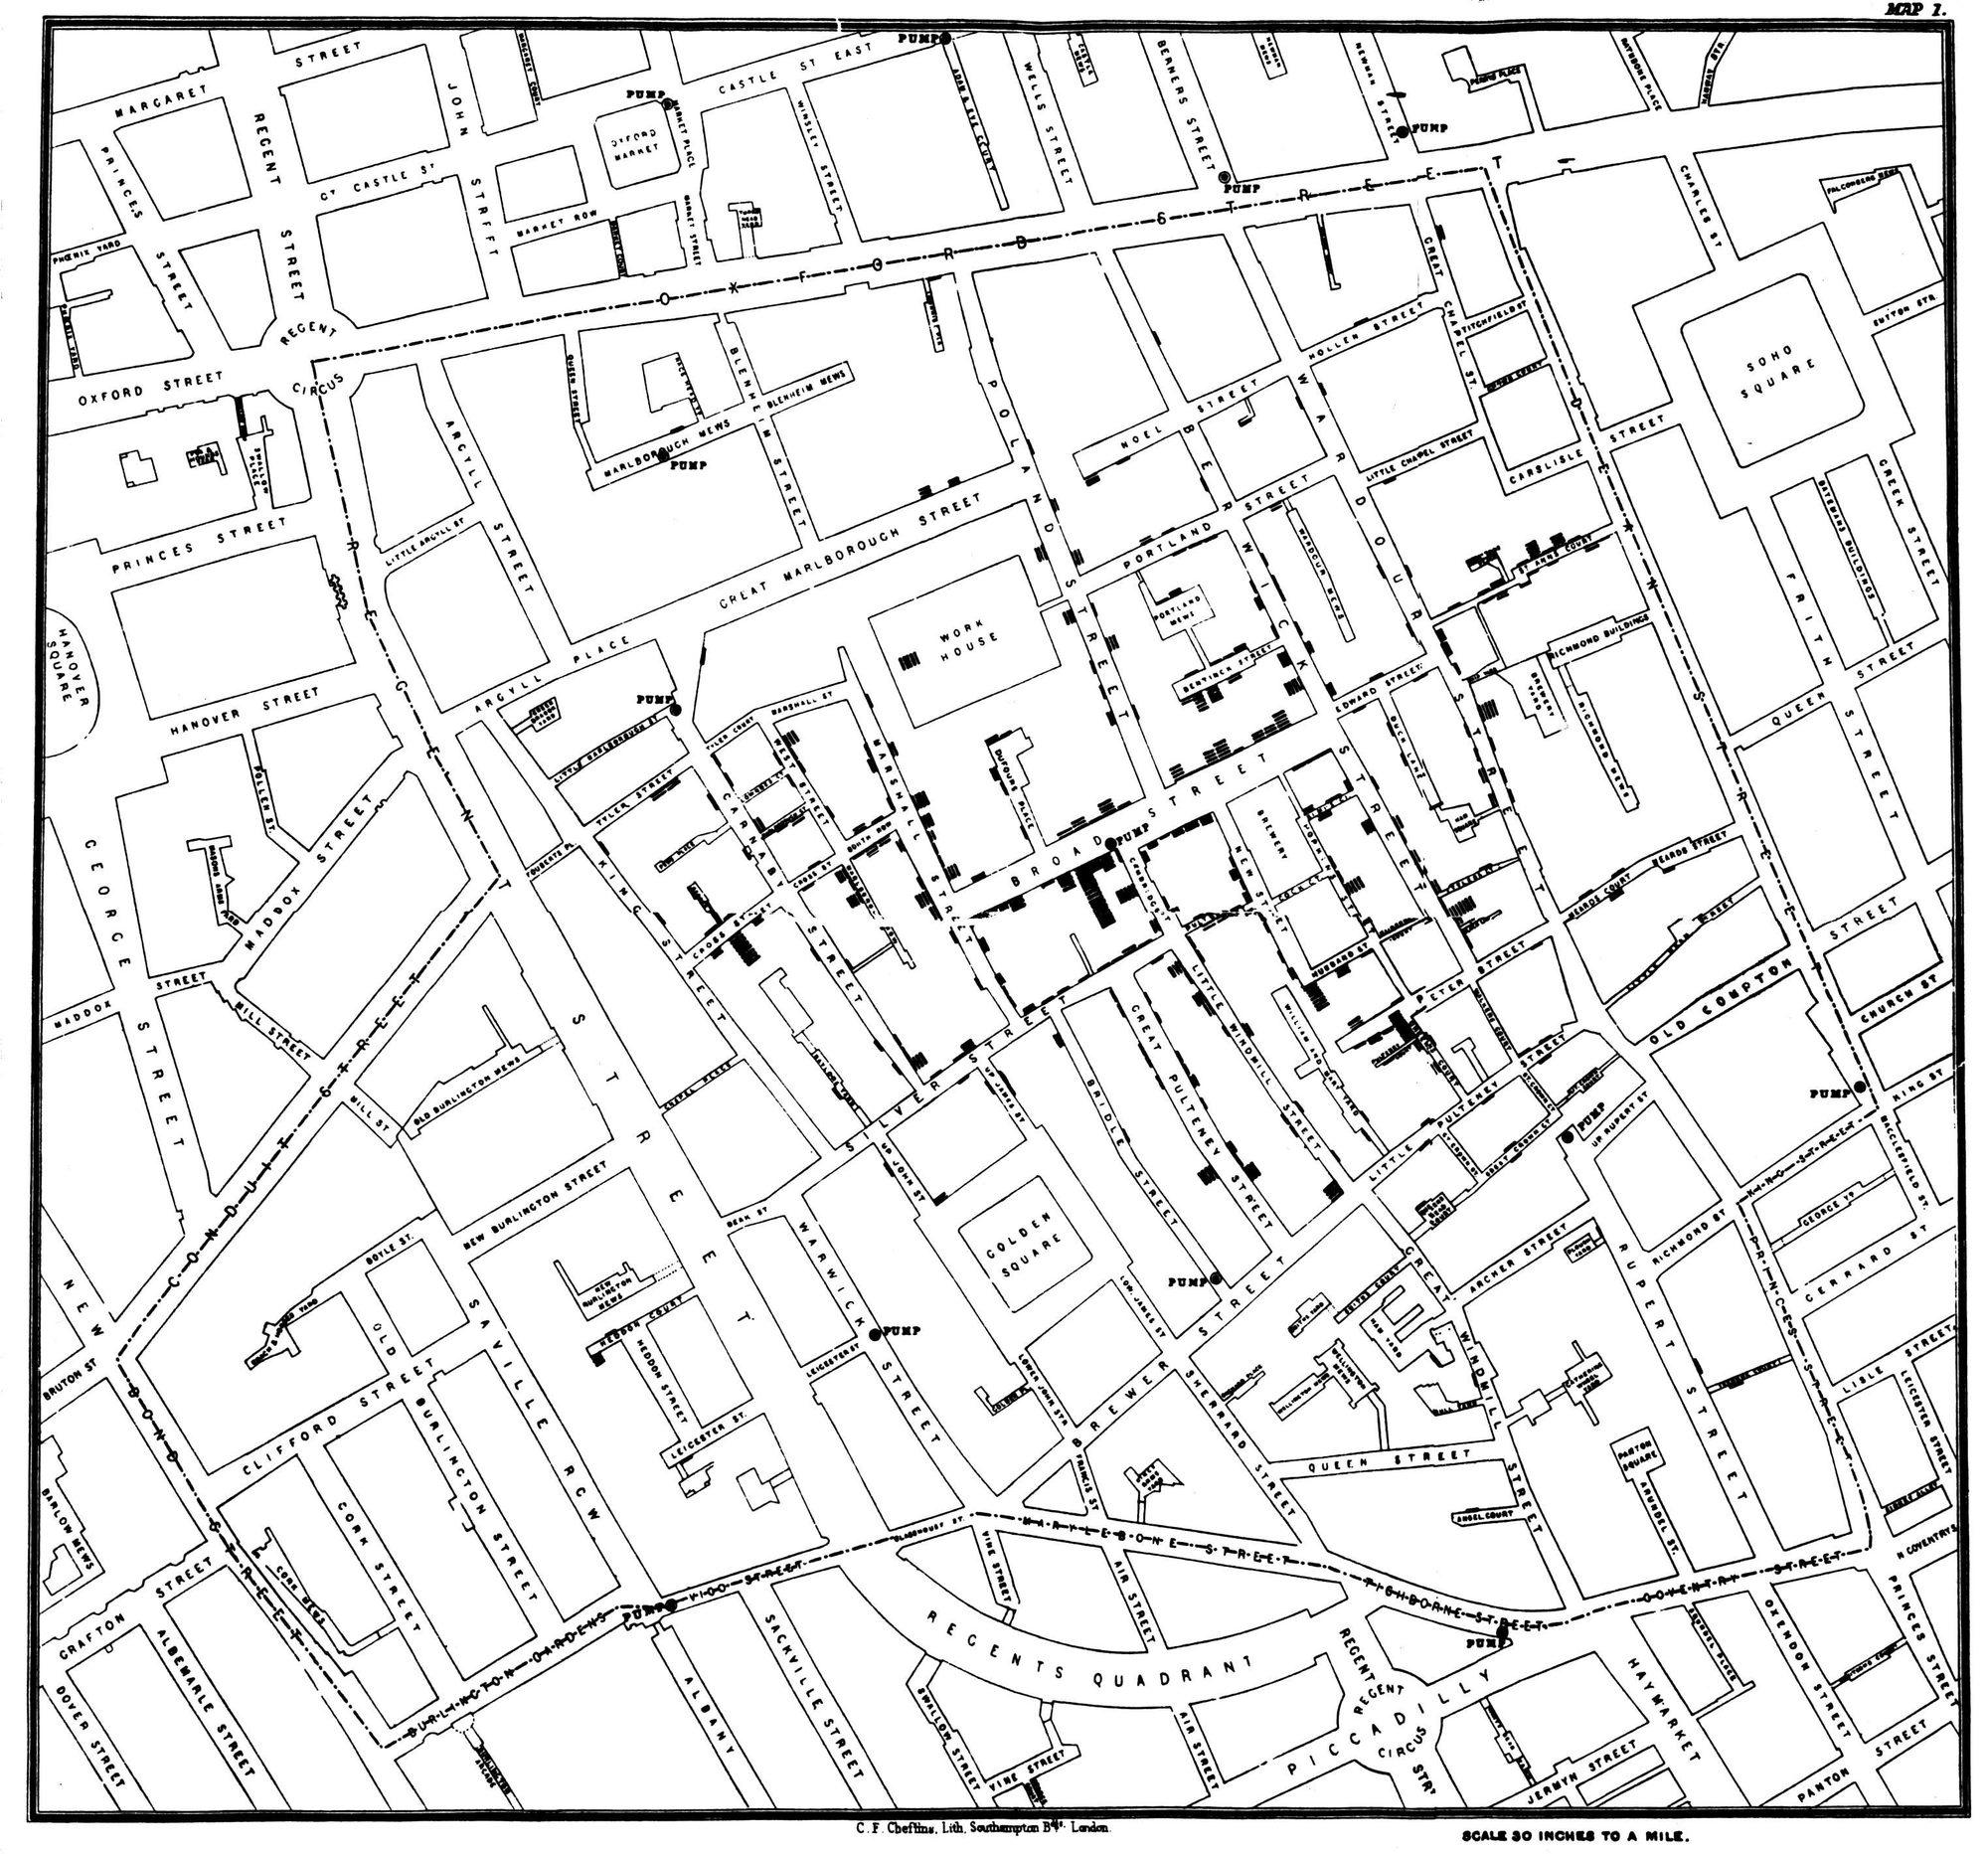

John Snow(왕좌의 게임에 나오는 Jon Snow가 아닙니다) 콜레라 맵은 본질적으로 초기의 점 맵 비주얼리제이션입니다. 런던 지역 각 세대에 콜레라로 사망한 인원 수를 표시하기 위해 도시 구역에 작은 막대 그래프를 사용합니다. 왜 사망 추세가 다른 곳보다 높은지 알아내려는 시도로 이 막대의 집중도와 길이가 어떤 특정 도시 구역 집단을 표시합니다. 그 결과, 콜레라의 피해를 가장 많이 입은 세대들은 모두 같은 우물을 식수로 사용하고 있다는 것을 발견했습니다. 당시, 이것은 완전히 새로운 발견이었습니다. 콜레라 발병률이 높게 집중된 지역에서 문제가 된 우물이 사용되었고 그 우물은 하수로 오염되었던 것입니다. 이 발견 사항을 런던의 콜레라 발병 추세에 더 넓게 적용하자, 그 질환과 오염된 우물 간의 분명한 관계를 추적하여 밝혀내는 데 도움이 되었습니다. 그 뒤로부터 하수도 시스템을 구축하여 우물을 오염되지 않게 보호하는 것이 콜레라를 예방하기 위한 솔루션이 되었습니다.

목적을 효과적으로 달성한 시각화가 잘 된 시각화!

## 데이터 시각화 역량 기르기

1. How-to : matplotlib, seaborn

2. When : kaggle 및 여러 사례들

시각화 공부의 지향점 : 어떤 종류가 있는지 알고, **목적에 맞는** 적절한 시각화 방법을 고르기


# Matplotlib, seaborn

https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png

##1. anatomy of a figure

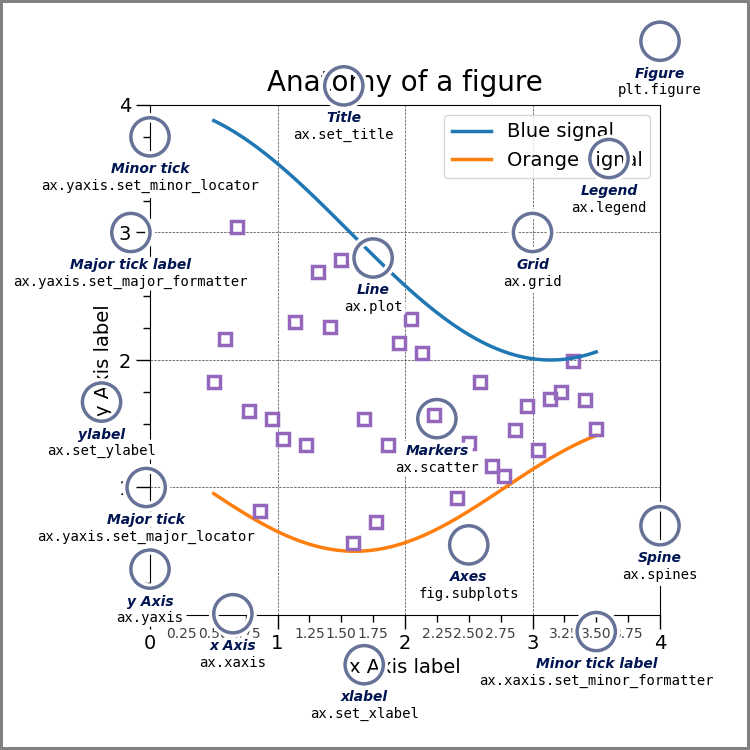

모든 그림은 Figure 객체. 정식으로는 matplotlib.figure.Figure 클래스 객체에 포함되어 있다. 내부 플롯(inline plot)이 아닌 경우에는 하나의 Figure는 하나의 아이디 숫자와 윈도우(Window)를 가진다. 주피터 노트북에서는 윈도우 객체가 생성되지 않지만 파이썬을 독립 실행하는 경우에는 하나의 Figure당 하나의 윈도우를 별도로 가진다. Figure 객체에 대한 자세한 설명은 다음 웹사이트를 참조한다.

http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure

figure

원래 Figure를 생성하려면 figure 명령을 사용하여 그 반환값으로 Figure 객체를 얻어야 한다. 그러나 일반적인 plot 명령 등을 실행하면 자동으로 Figure를 생성해주기 때문에 일반적으로는 figure 명령을 잘 사용하지 않는다. figure 명령을 명시적으로 사용하는 경우는 여러개의 윈도우를 동시에 띄워야 하거나(line plot이 아닌 경우), Jupyter 노트북 등에서(line plot의 경우) 그림의 크기를 설정하고 싶을 때이다. 그림의 크기는 figsize 인수로 설정한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 10, 100) # linspace : 시작값, 끝값, 그 사이를 몇개로 나눌것인지 결정
Y = np.cos(X)

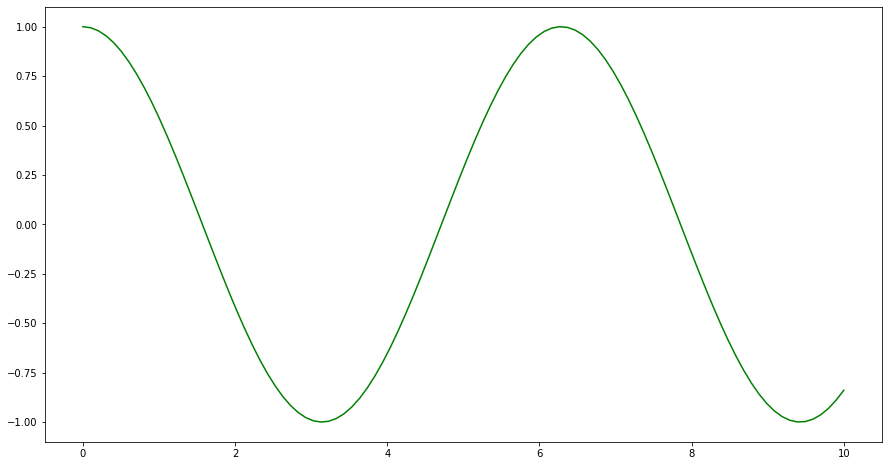

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(X, Y, color = 'green')

plt.show()

##2. subplots layout

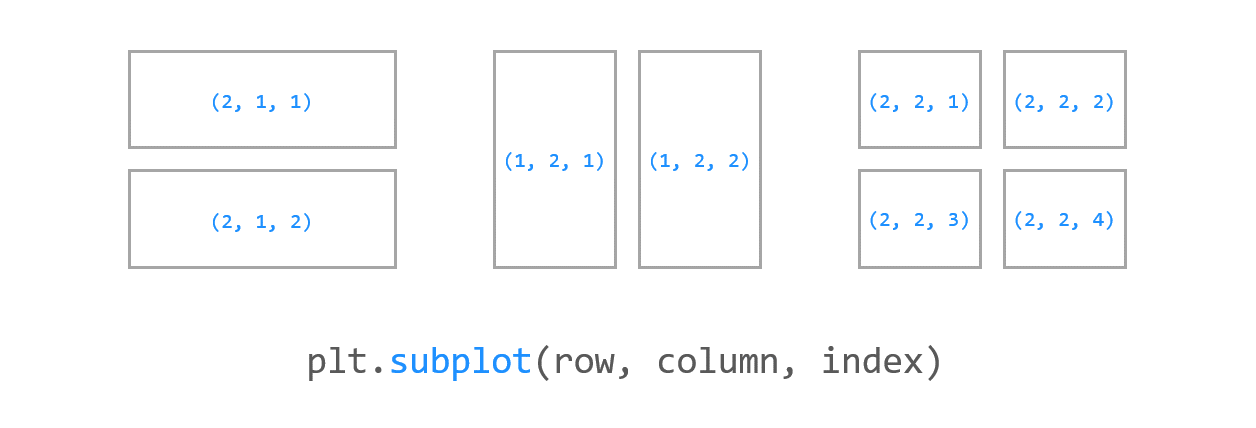

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 10)
x2 = np.linspace(0, 8)

y1 = np.cos(x1)
y2 = np.cos(np.pi * x2)

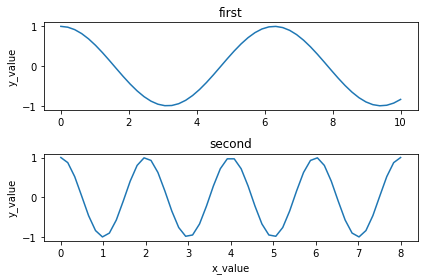

In [ ]:
plt.subplot(2, 1, 1)                # nrows=2, ncols=1, index=1
plt.plot(x1, y1)
plt.title('first')
plt.ylabel('y_value')

plt.subplot(2, 1, 2)                # nrows=2, ncols=1, index=2
plt.plot(x2, y2)
plt.title('second')
plt.xlabel('x_value')
plt.ylabel('y_value')

plt.tight_layout()
plt.show()

## 3. Basic Plots

### 1) plot

시간, 순서 등에 따라 어떻게 변화하는지 보여주기 위해 사용한다.

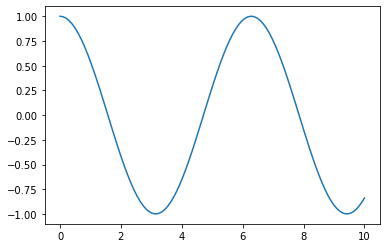

In [ ]:
plt.plot(X,Y)

plt.show()

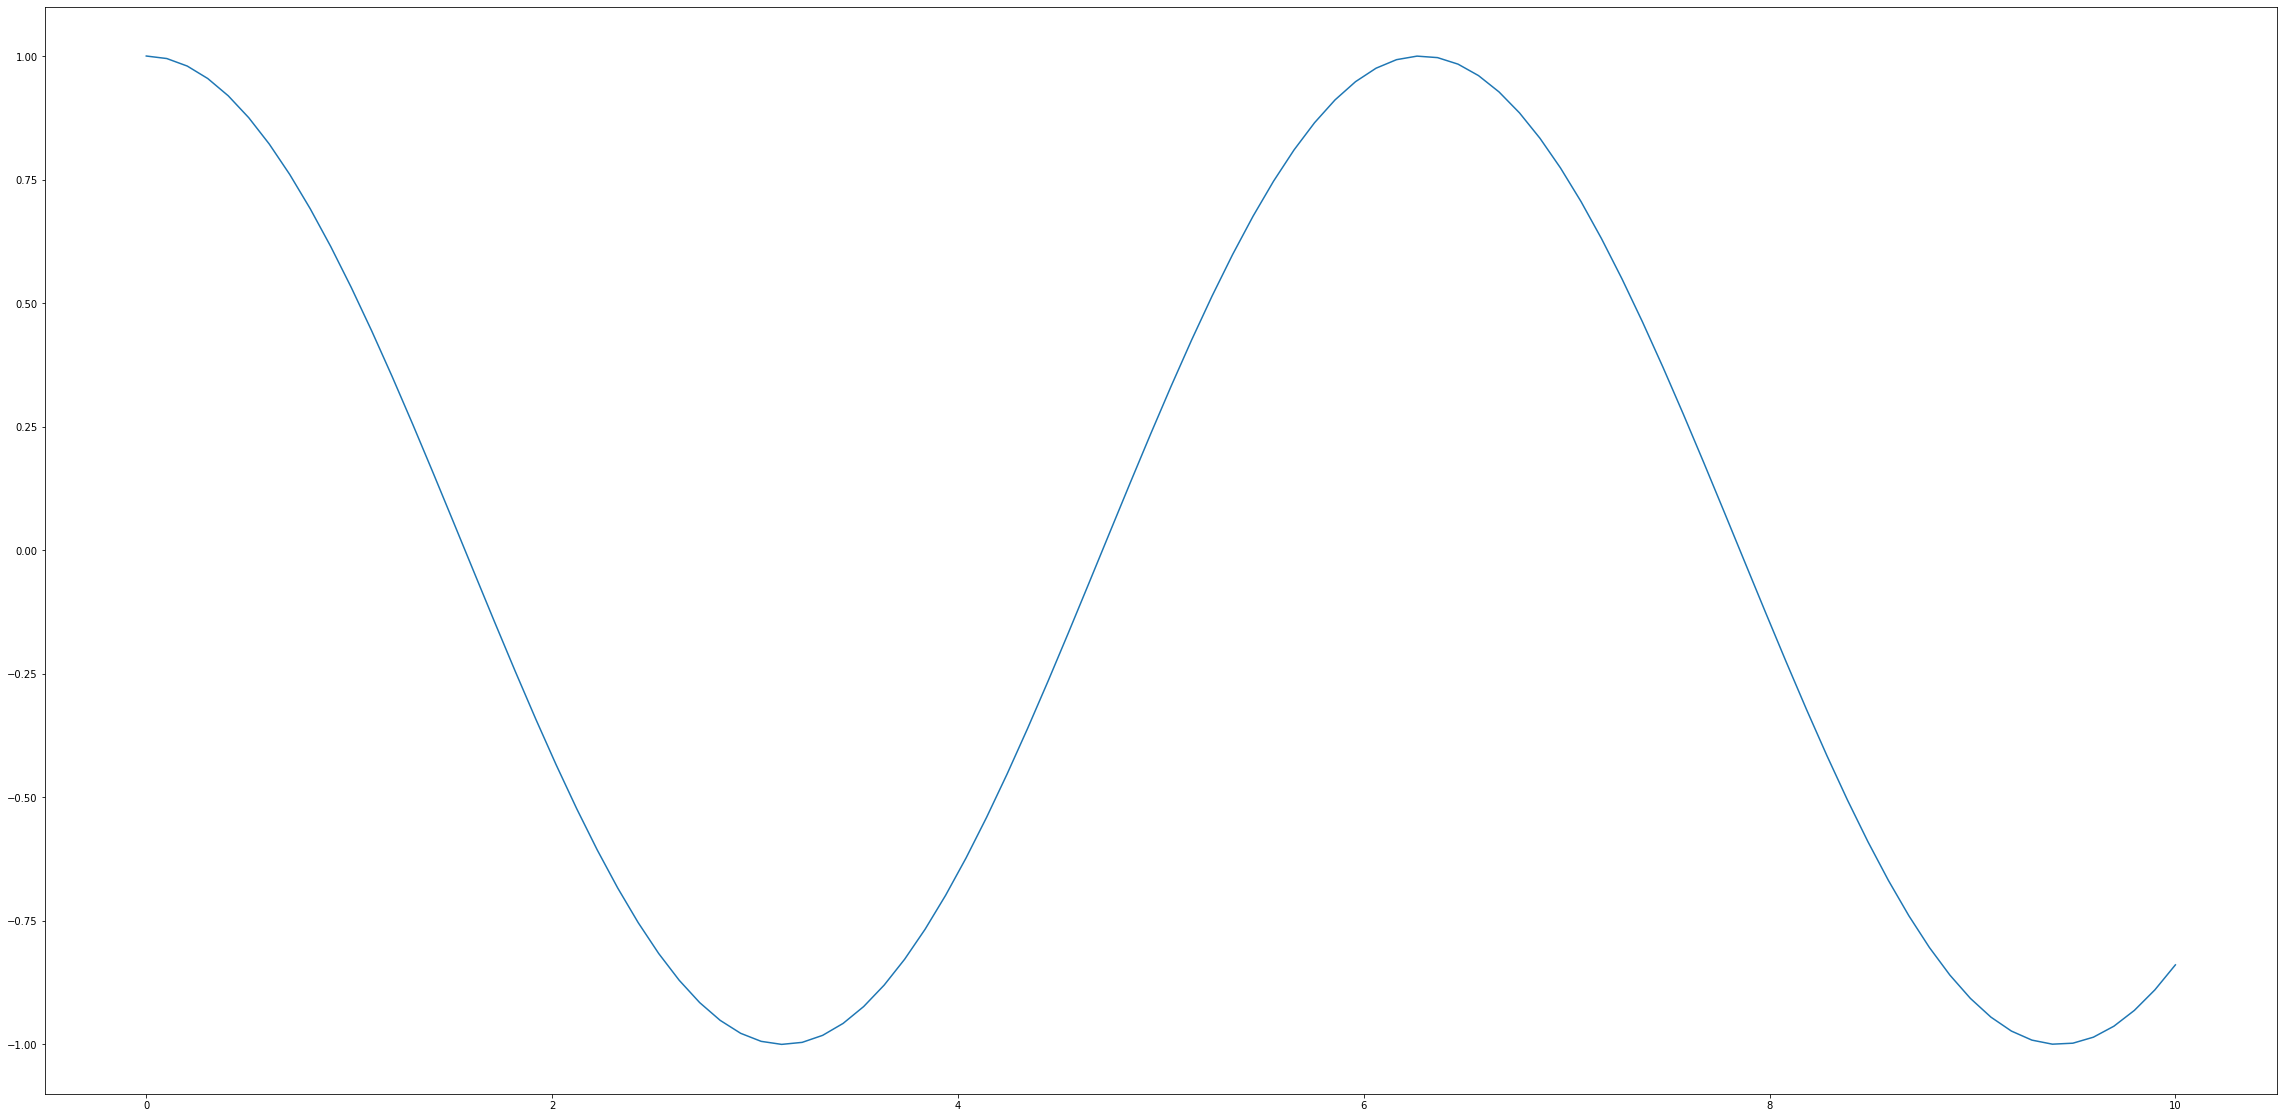

In [ ]:
plt.figure(figsize=(40, 20))

plt.plot(X,Y)

plt.show()

### 2) scatterplot

2차원 데이터 집합의 상관관계를 살펴볼 때 유용함

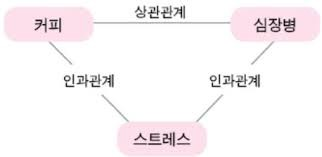

In [ ]:
cal_data = pd.read_csv('/content/sample_data/california_housing_train.csv')

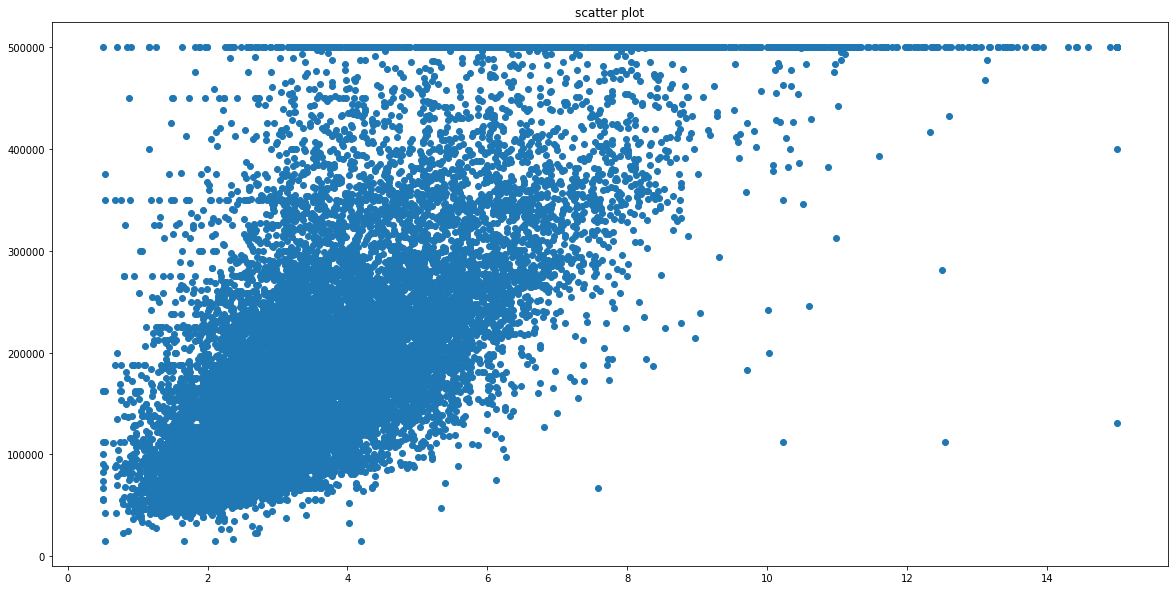

In [ ]:
plt.figure(figsize=(20, 10))

plt.title('scatter plot')

plt.scatter(cal_data['median_income'], cal_data['median_house_value'])

plt.show()

In [ ]:
cal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


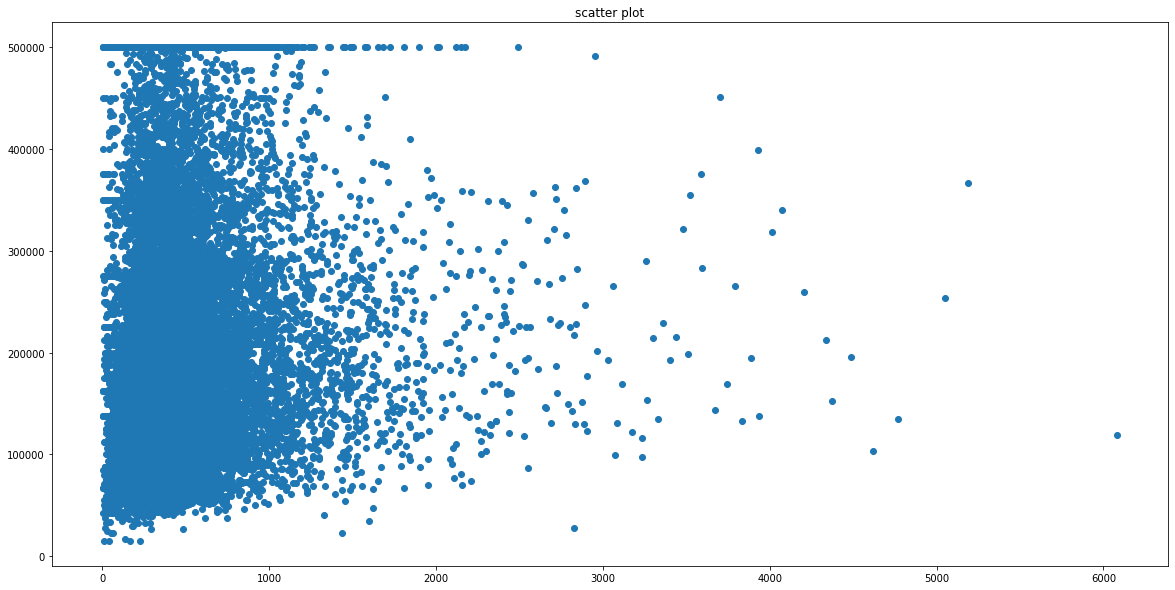

In [ ]:
plt.figure(figsize=(20, 10))

plt.title('scatter plot')

plt.scatter(cal_data['households'], cal_data['median_house_value'])

plt.show()

In [ ]:
import seaborn as sns

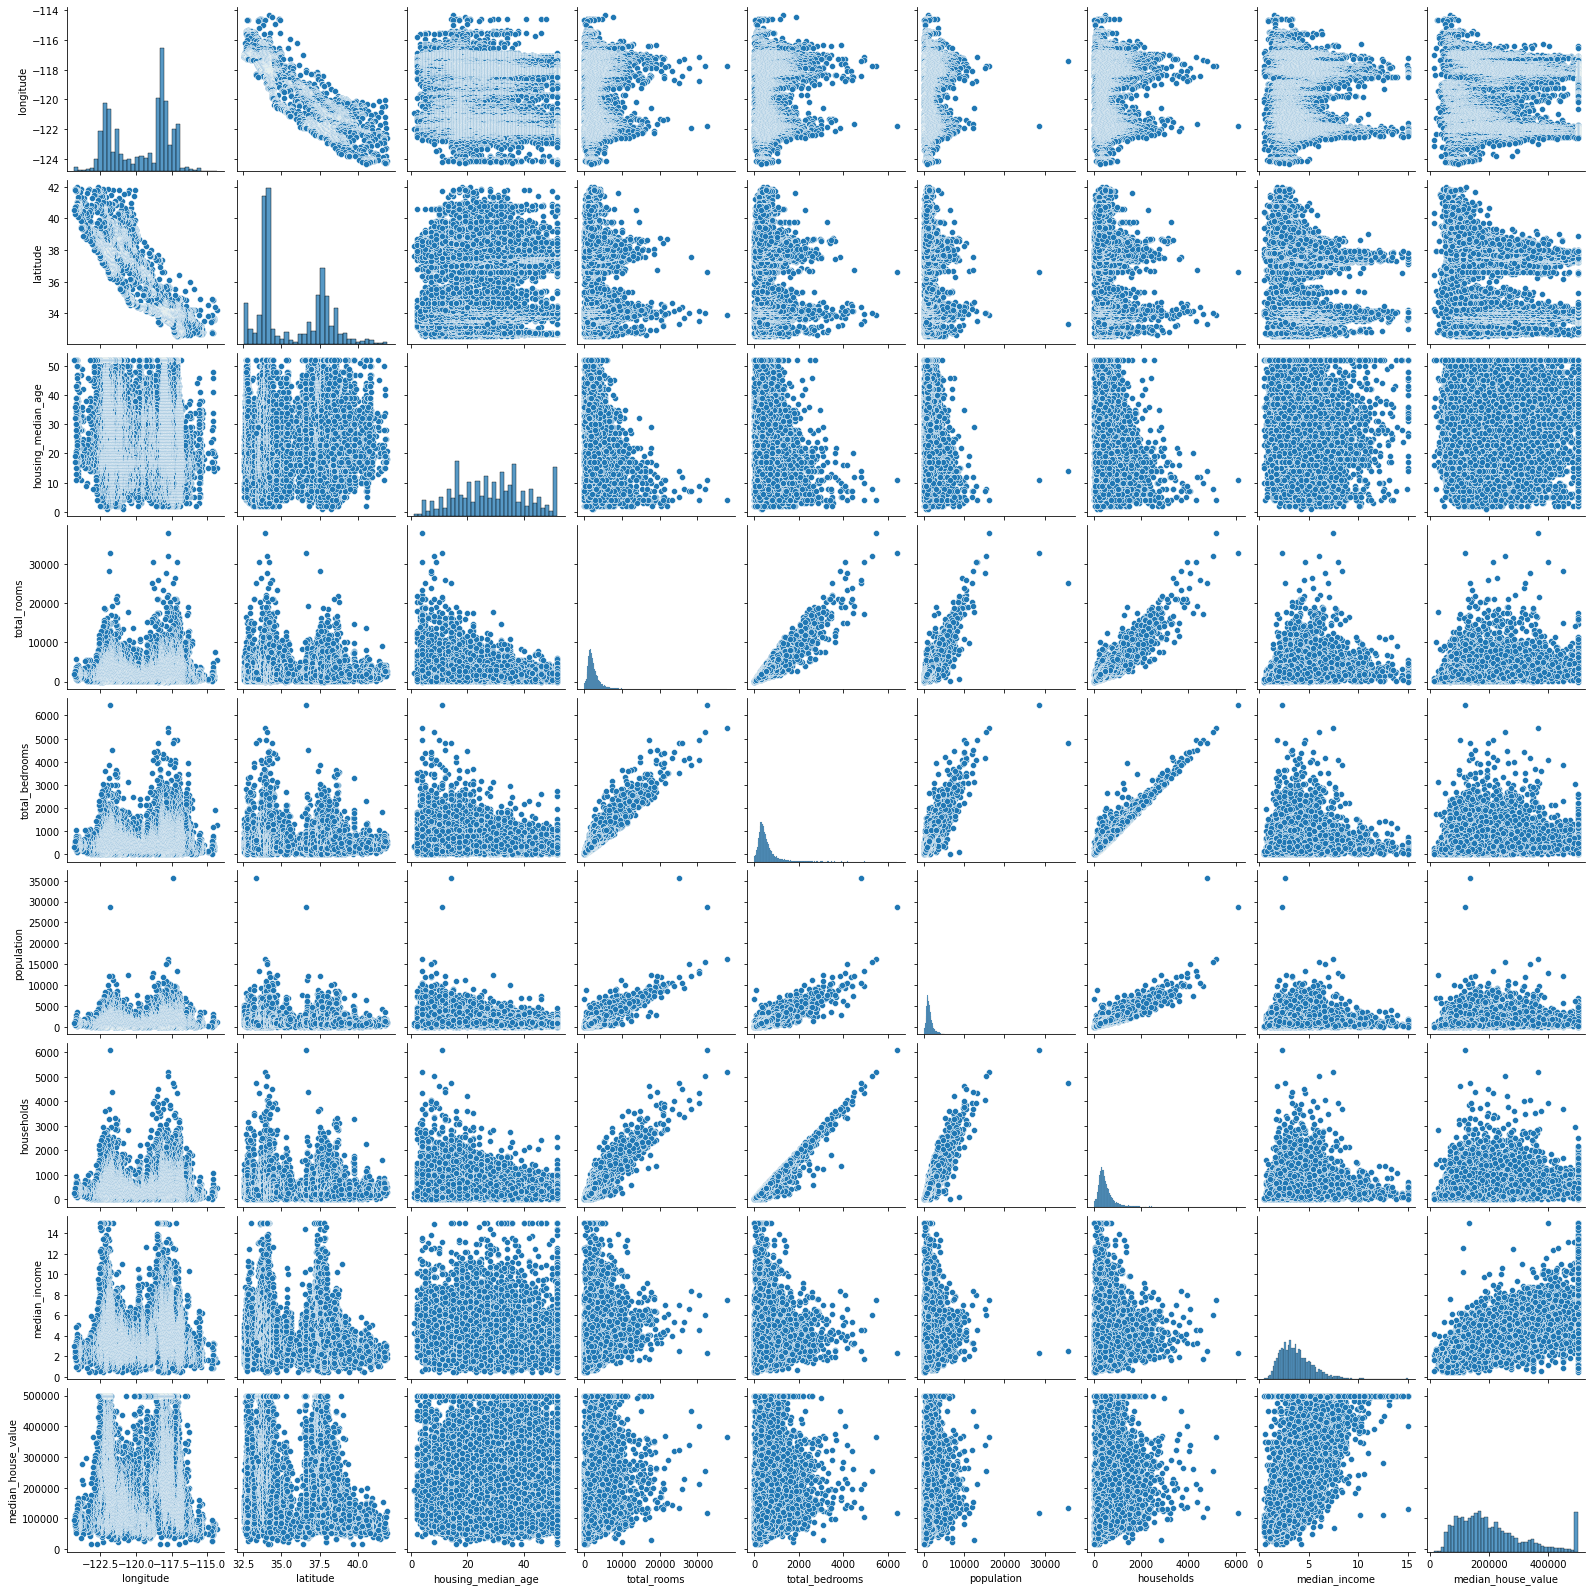

In [ ]:
sns.pairplot(cal_data)

In [ ]:
import pandas as pd

In [ ]:
df = sns.load_dataset('tips')
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

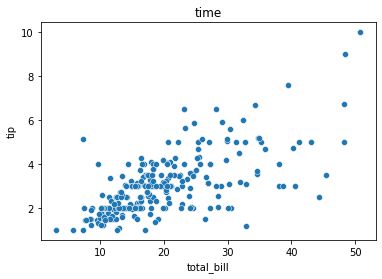

In [ ]:
plt.title('time')

sns.scatterplot(data=df, x="total_bill", y="tip")

plt.show()

### 3) bar graph

데이터가 카테고리 값인 경우 유용함

In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204374 entries, 0 to 204373
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   연번       204374 non-null  int64 
 1   날짜       204374 non-null  object
 2   호선       204374 non-null  int64 
 3   역번호      204374 non-null  int64 
 4   역명       204374 non-null  object
 5   구분       204374 non-null  object
 6   06시 이전   204374 non-null  int64 
 7   06시-07시  204374 non-null  int64 
 8   07시-08시  204374 non-null  int64 
 9   08시-09시  204374 non-null  int64 
 10  09시-10시  204374 non-null  int64 
 11  10시-11시  204374 non-null  int64 
 12  11시-12시  204374 non-null  int64 
 13  12시-13시  204374 non-null  int64 
 14  13시-14시  204374 non-null  int64 
 15  14시-15시  204374 non-null  int64 
 16  15시-16시  204374 non-null  int64 
 17  16시-17시  204374 non-null  int64 
 18  17시-18시  204374 non-null  int64 
 19  18시-19시  204374 non-null  int64 
 20  19시-20시  204374 non-null  int64 
 21  20시-21시  2

호선별 21년도 총 승객 합계 데이터

In [ ]:
sub['합 계'].groupby(sub['호선']).sum()

호선
1    128978515
2    791308920
3    300247516
4    284477537
5    370391884
6    191289055
7    404922022
8    110232741
Name: 합 계, dtype: int64

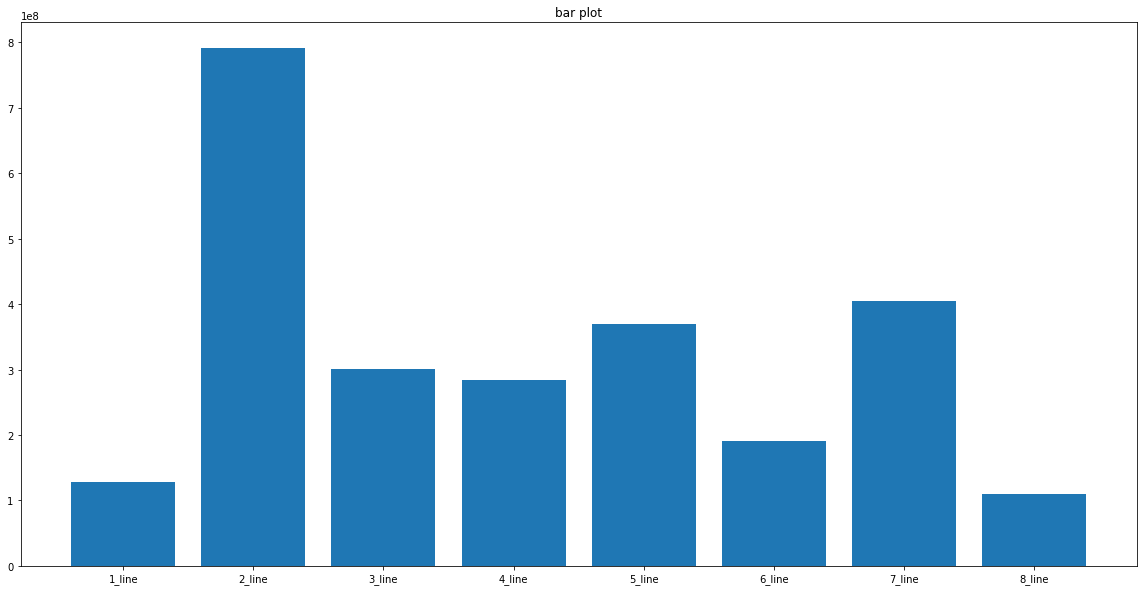

In [ ]:
plt.figure(figsize=(20, 10))

plt.title('bar plot')

xlabel = ['1_line', '2_line', '3_line', '4_line', '5_line', '6_line', '7_line', '8_line']

plt.xticks(range(1, 9), xlabel)

plt.bar(range(1, 9), sub['합 계'].groupby(sub['호선']).sum())

plt.show()

### 4) boxplot



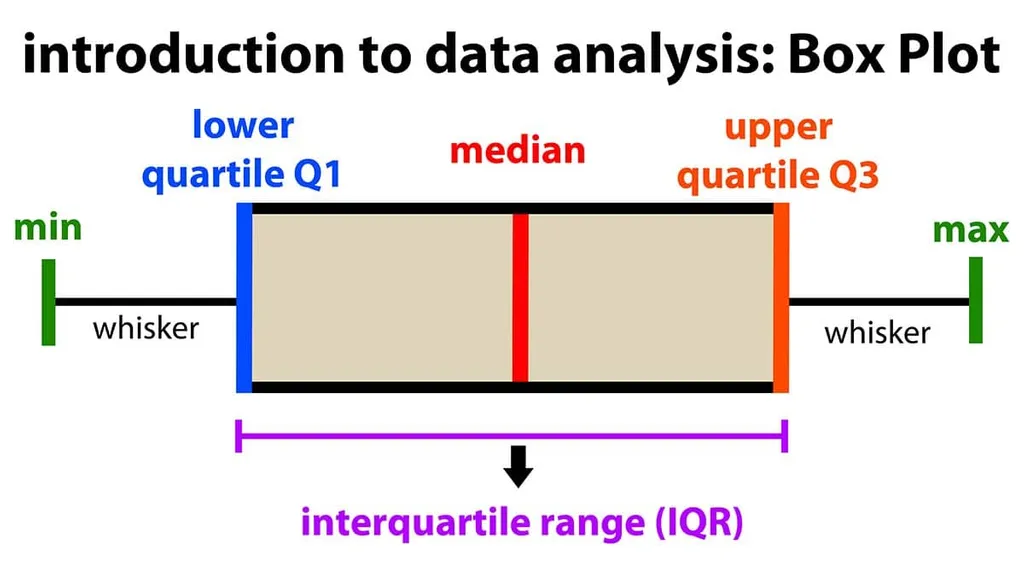

In [ ]:
cal_data = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
cal_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

In [ ]:
cal_data.describe()[['latitude', 'housing_median_age', 'median_income']]

latitude  housing_median_age  median_income
count  17000.000000        17000.000000   17000.000000
mean      35.625225           28.589353       3.883578
std        2.137340           12.586937       1.908157
min       32.540000            1.000000       0.499900
25%       33.930000           18.000000       2.566375
50%       34.250000           29.000000       3.544600
75%       37.720000           37.000000       4.767000
max       41.950000           52.000000      15.000100

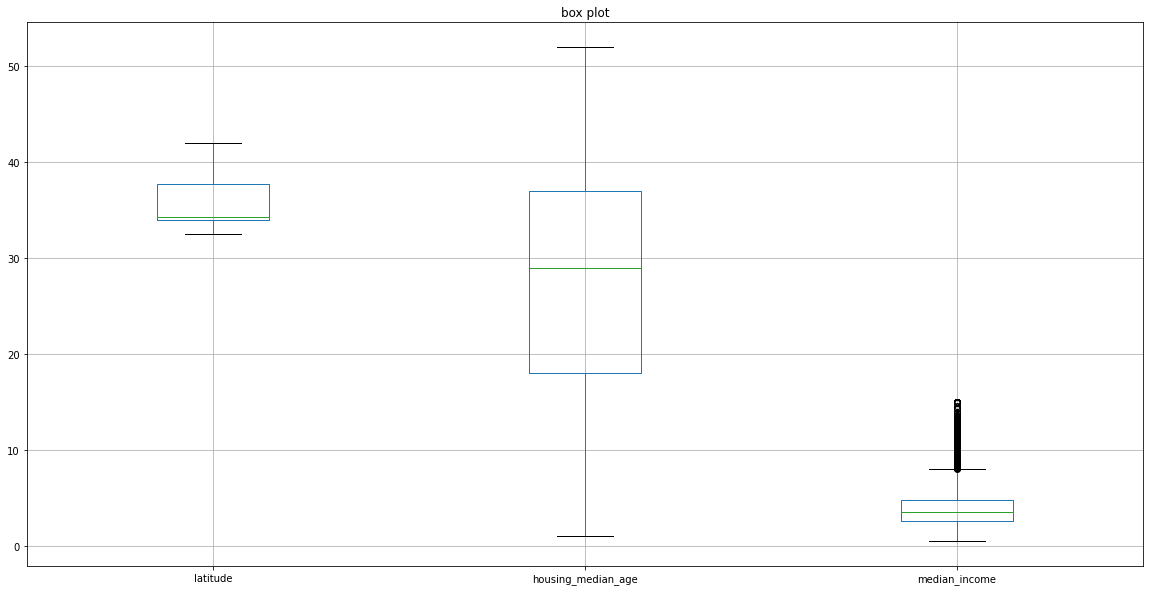

In [ ]:
plt.figure(figsize=(20, 10))

plt.title('box plot')

cal_data.boxplot(column = ['latitude', 'housing_median_age', 'median_income'])

plt.show()

# 2. 잘 된 시각화인가?

In [ ]:
sub.head()

연번          날짜  호선  역번호   역명  구분  06시 이전  06시-07시  07시-08시  08시-09시  ...  \
0   1  2021-01-01   1  150  서울역  승차      86      111      157      306  ...   
1   2  2021-01-01   1  150  서울역  하차      85      355      438      592  ...   
2   3  2021-01-01   1  151   시청  승차      43       45       75      111  ...   
3   4  2021-01-01   1  151   시청  하차      40      145      176      312  ...   
4   5  2021-01-01   1  152   종각  승차      49       59       89      126  ...   

   15시-16시  16시-17시  17시-18시  18시-19시  19시-20시  20시-21시  21시-22시  22시-23시  \
0      837      796      839      658      579      479      510      445   
1      781      710      626      437      425      354      307      134   
2      227      233      347      294      186      216      204      110   
3      158      140      152      121       57       54       64       23   
4      513      548      504      572      492      593      513      130   

   23시 이후   합 계  
0     101  9339  
1      77  9951  
2      29  2947  
3      17  2700  
4      31  5686  

[5 rows x 26 columns]

연간 지하철 이용객 추이는?

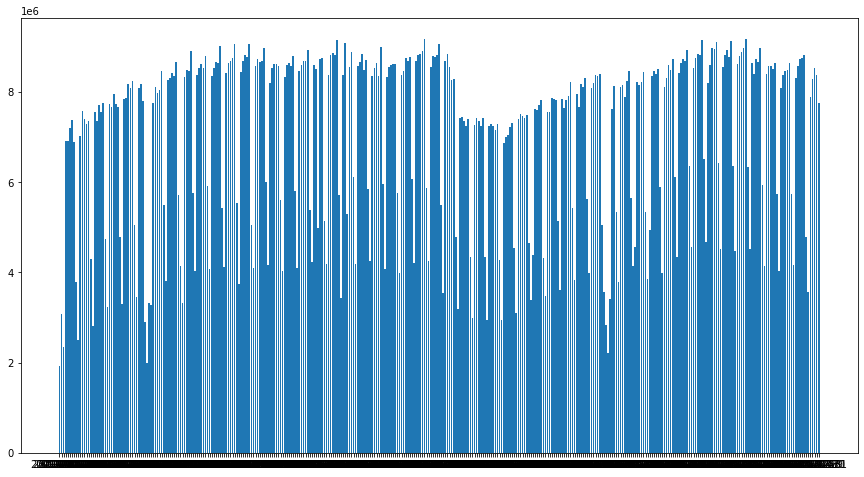

In [ ]:
plt.figure(figsize=(15, 8))

plt.bar(sub['날짜'].unique(), sub['합 계'].groupby(sub['날짜']).sum())

plt.show()

이 그래프를 통해서 어떤 의미를 얻을 수 있는지 쉽게 와닿지 않음

In [ ]:
sub['월'] = sub['날짜'].str[:7]

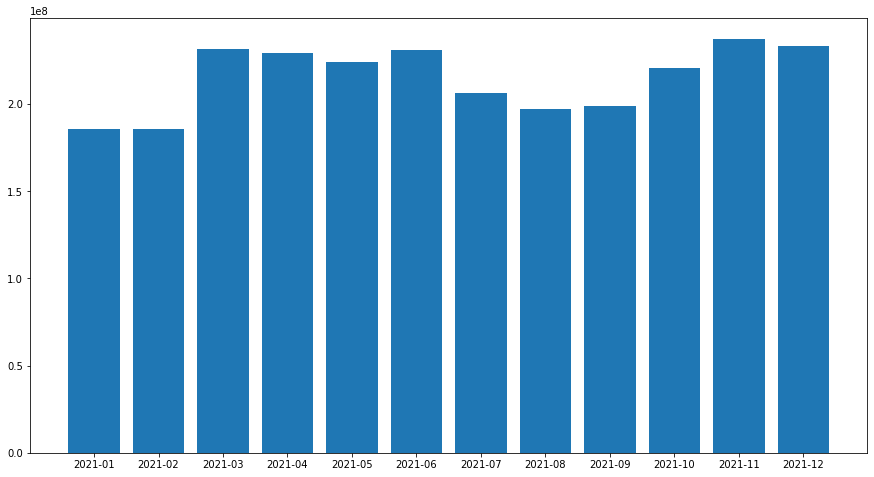

In [ ]:
plt.figure(figsize=(15, 8))

plt.bar(sub['월'].unique(), sub['합 계'].groupby(sub['월']).sum())

plt.show()

시각화 목적에 맞게 적절한 데이터 프레임 구성고 방법을 선택해야함

# 3. 시각화 실습 

팁 금액과 가장 연관관계가 높은 요인은?

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

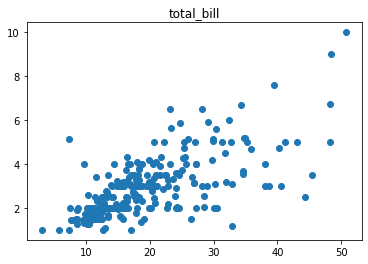

In [ ]:
plt.title('total_bill')

plt.scatter(df['total_bill'], df['tip'])

plt.show()

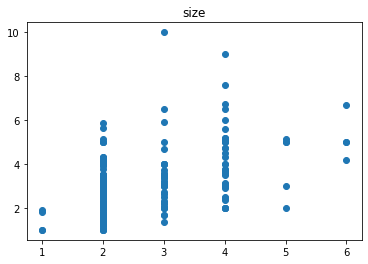

In [ ]:
plt.title('size')

plt.scatter(df['size'], df['tip'])

plt.show()

In [ ]:
df['tip'].groupby(df['size']).mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

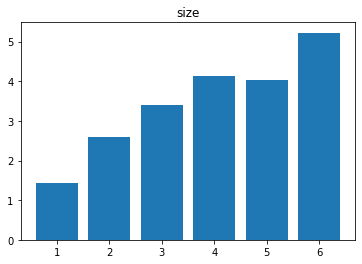

In [ ]:
plt.title('size')

plt.bar(range(1,7), df['tip'].groupby(df['size']).mean())

plt.show()

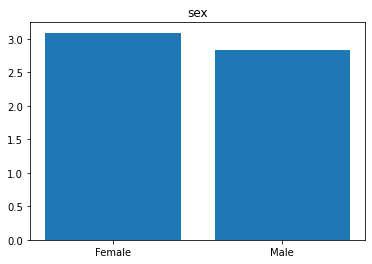

In [ ]:
plt.title('sex')

plt.bar(['Female', 'Male'], df['tip'].groupby(df['sex']).mean())

plt.show()

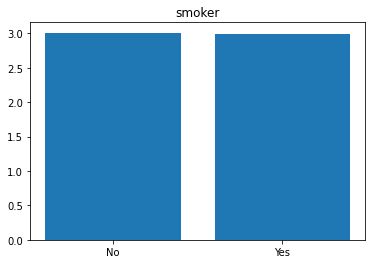

In [ ]:
plt.title('smoker')

plt.bar(['No', 'Yes'], df['tip'].groupby(df['smoker']).mean())

plt.show()

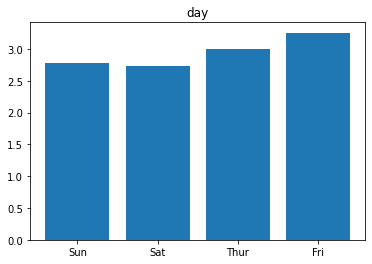

In [ ]:
plt.title('day')

plt.bar(['Sun', 'Sat', 'Thur', 'Fri'], df['tip'].groupby(df['day']).mean())

plt.show()

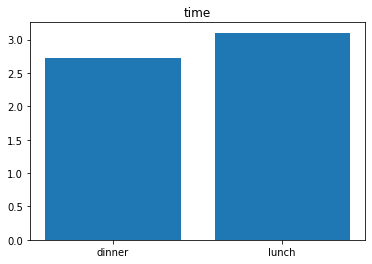

In [ ]:
plt.title('time')

plt.bar(['dinner', 'lunch'], df['tip'].groupby(df['time']).mean())

plt.show()

sex에 따른 total과 tip의 연관관계는 어떻게 다를까?

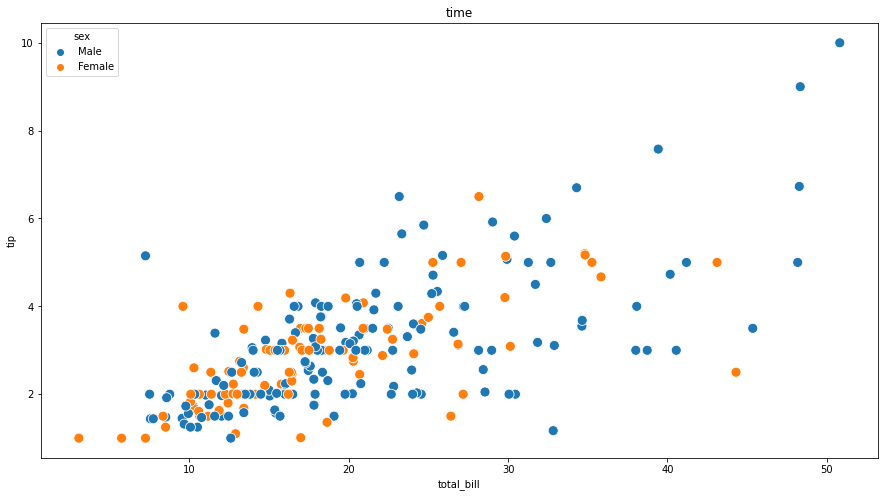

In [ ]:
plt.figure(figsize=(15, 8))

plt.title('time')

sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex", s = 100)

plt.show()

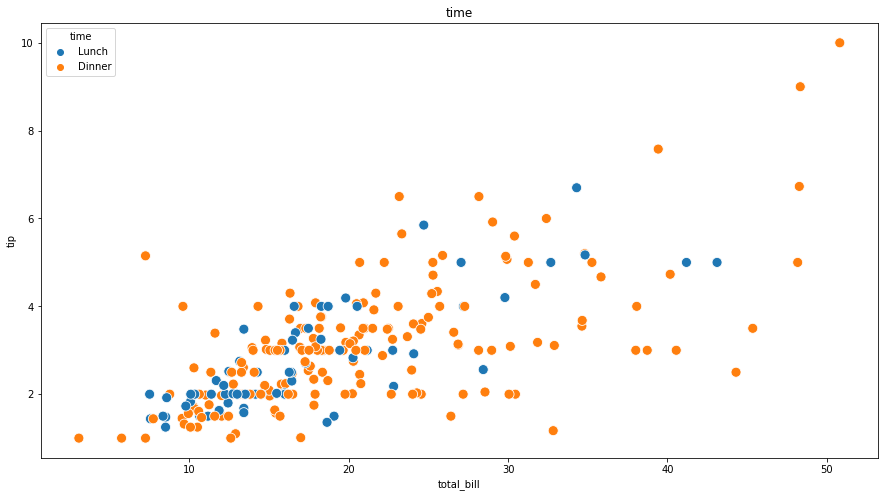

In [ ]:
plt.figure(figsize=(15, 8))

plt.title('time')

sns.scatterplot(data=df, x="total_bill", y="tip", hue="time", s = 100)

plt.show()

1년동안 월별로 호선별 이용 추이는 어떻게 달라졌는가?

In [ ]:
sub.head()

연번          날짜  호선  역번호   역명  구분  06시 이전  06시-07시  07시-08시  08시-09시  ...  \
0   1  2021-01-01   1  150  서울역  승차      86      111      157      306  ...   
1   2  2021-01-01   1  150  서울역  하차      85      355      438      592  ...   
2   3  2021-01-01   1  151   시청  승차      43       45       75      111  ...   
3   4  2021-01-01   1  151   시청  하차      40      145      176      312  ...   
4   5  2021-01-01   1  152   종각  승차      49       59       89      126  ...   

   16시-17시  17시-18시  18시-19시  19시-20시  20시-21시  21시-22시  22시-23시  23시 이후  \
0      796      839      658      579      479      510      445     101   
1      710      626      437      425      354      307      134      77   
2      233      347      294      186      216      204      110      29   
3      140      152      121       57       54       64       23      17   
4      548      504      572      492      593      513      130      31   

    합 계        월  
0  9339  2021-01  
1  9951  2021-01  
2  2947  2021-01  
3  2700  2021-01  
4  5686  2021-01  

[5 rows x 27 columns]

In [ ]:
m_l_df = pd.DataFrame(sub['합 계'].groupby([sub['월'], sub['호선']]).sum()).reset_index()

In [ ]:
m_l_df.columns = ['month', 'line', 'sum']

In [ ]:
m_l_df

month  line       sum
0   2021-01     1   9049675
1   2021-01     2  56663890
2   2021-01     3  21457381
3   2021-01     4  20303119
4   2021-01     5  26197251
..      ...   ...       ...
91  2021-12     4  25906723
92  2021-12     5  33533472
93  2021-12     6  17184891
94  2021-12     7  36117430
95  2021-12     8  10020059

[96 rows x 3 columns]

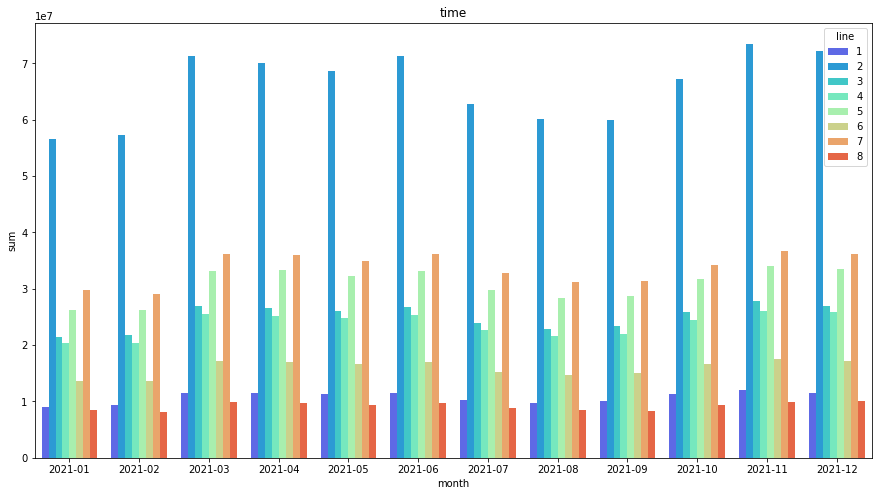

In [ ]:
plt.figure(figsize=(15, 8))

plt.title('time')

sns.barplot(data = m_l_df, x='month', y='sum', hue="line", palette = 'rainbow')

plt.show()

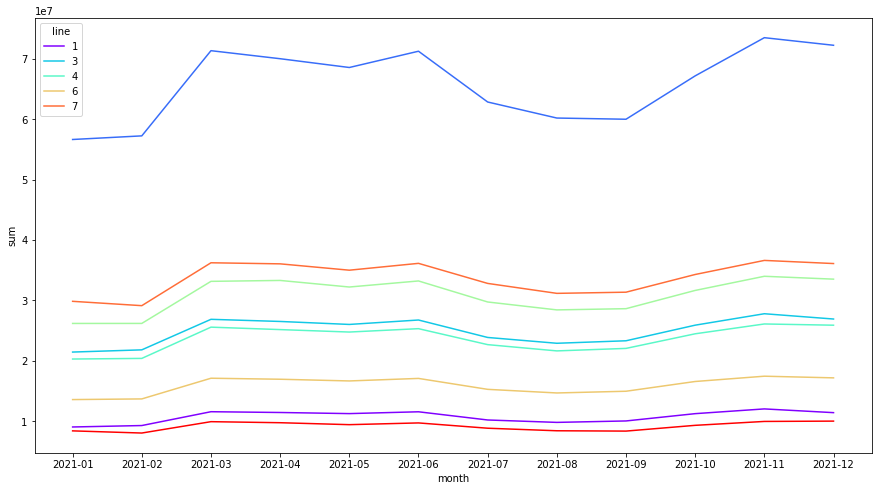

In [ ]:
plt.figure(figsize=(15, 8))

sns.lineplot(data = m_l_df, x='month', y='sum', hue="line", palette = 'rainbow')

plt.show()